<a href="https://colab.research.google.com/github/Mr-Pacheco/ML_titanic/blob/main/titanic_0.79665.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
# Reading the csv
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv('gender_submission.csv')

In [4]:
print(gender.shape)
gender.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_1 = train.copy()
train_1['Cabin'] = train['Cabin'].fillna('w')
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,w,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,w,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,w,S


In [9]:
train_1['Cabin'].unique()
def extract_feature(dataset):
    dataset['n_cabin'] = dataset['Cabin'].replace(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
    'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33','F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
    'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4','A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
    'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19','B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
    'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40','T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
    'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14','B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
    'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68','B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
    'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63','C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30','E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 
    'A36','B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42','C148'], 'Cabin').str.replace('w','Without_cabin')
    return dataset

In [10]:
train_1 = extract_feature(train_1)
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,w,S,Without_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,w,S,Without_cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,w,S,Without_cabin


In [11]:
test_1 = test.copy()
test_1['Cabin'] = test['Cabin'].fillna('w')
test.Cabin.unique()
def extract_cabin(dataset):
    dataset['n_cabin'] = dataset['Cabin'].replace(['B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], 'Cabin').str.replace('w','Without_cabin')
    return dataset

In [12]:
test_1['Cabin'].unique()

array(['w', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [13]:
test_1 = extract_cabin(test_1)
test_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,w,Q,Without_cabin
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,w,S,Without_cabin
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,w,Q,Without_cabin
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,w,S,Without_cabin
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,w,S,Without_cabin


In [14]:
test_1.n_cabin.unique()

array(['Without_cabin', 'Cabin'], dtype=object)

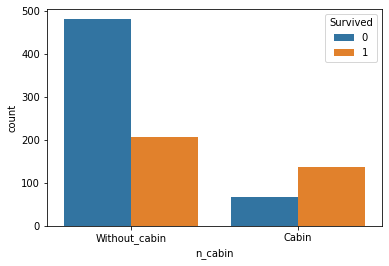

In [15]:
sns.countplot(x = 'n_cabin', hue = 'Survived', data = train_1)

In [16]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 30, 45, 60, 80]
label_names = ['Missing','Infant','Child','Teenager','Young Adult', 'Adult','Old Adult','Senior']

train_1 = process_age(train_1, cut_points, label_names)
test_1 = process_age(test_1, cut_points, label_names)

In [17]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_cabin,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,w,S,Without_cabin,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,w,S,Without_cabin,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,w,S,Without_cabin,Adult


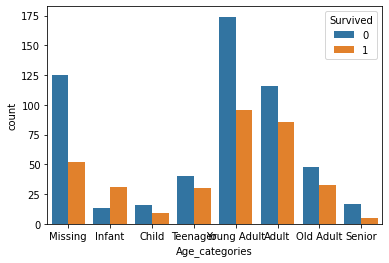

In [18]:
sns.countplot(x = 'Age_categories', hue = 'Survived', data = train_1)

In [19]:
def family(dataset):
  dataset['familysize'] = dataset['SibSp'] + dataset['Parch'] + 1
  return dataset
train_1 = family(train_1)
test_1 = family(test_1)

In [20]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_cabin,Age_categories,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,w,S,Without_cabin,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cabin,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,w,S,Without_cabin,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Cabin,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,w,S,Without_cabin,Adult,1


In [21]:
train_1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familysize
PassengerId,1.000000,-0.005007,-0.035144,0.038062,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.011497,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.360547,0.083081,0.018443,-0.549500,0.065997
Age,0.038062,0.011497,-0.360547,1.000000,-0.183470,-0.047017,0.135617,-0.148884
SibSp,-0.057527,-0.035322,0.083081,-0.183470,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.047017,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.135617,0.159651,0.216225,1.000000,0.217138
familysize,-0.040143,0.016639,0.065997,-0.148884,0.890712,0.783111,0.217138,1.000000


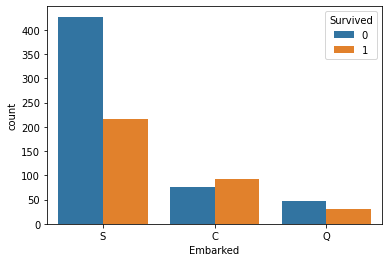

In [22]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_1)

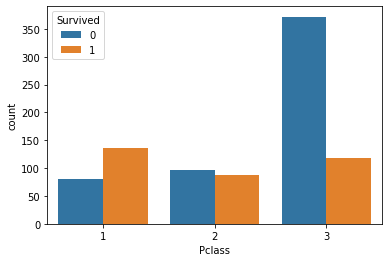

In [23]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_1)

In [24]:
train_1 = train_1.drop('Ticket', axis = 1)
test_1 = test_1.drop('Ticket', axis = 1)
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,n_cabin,Age_categories,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,w,S,Without_cabin,Young Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cabin,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,w,S,Without_cabin,Young Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Cabin,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,w,S,Without_cabin,Adult,1


In [25]:
def extract_feature(dataset):
    dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    dataset = dataset.rename(columns={"Name": "Title"})
    dataset['Title'] = dataset['Title'].replace(
        ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
         'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    return dataset

In [26]:
train_1 = extract_feature(train_1)
test_1 = extract_feature(test_1)
train_1.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,n_cabin,Age_categories,familysize
0,1,0,3,Mr,male,22.0,1,0,7.2500,w,S,Without_cabin,Young Adult,2
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C85,C,Cabin,Adult,2
2,3,1,3,Miss,female,26.0,0,0,7.9250,w,S,Without_cabin,Young Adult,1
3,4,1,1,Mrs,female,35.0,1,0,53.1000,C123,S,Cabin,Adult,2
4,5,0,3,Mr,male,35.0,0,0,8.0500,w,S,Without_cabin,Adult,1


In [27]:
def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

cut_points = [0, 10, 20, 30, 50, 70, 100, 1000]
label_names = [ 1, 2, 3, 4, 5, 6, 7]

train_1 = process_fare(train_1, cut_points, label_names)
test_1 = process_fare(test_1, cut_points, label_names)

In [28]:
train_1.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,n_cabin,Age_categories,familysize,Fare_categories
0,1,0,3,Mr,male,22.0,1,0,7.2500,w,S,Without_cabin,Young Adult,2,1
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C85,C,Cabin,Adult,2,6
2,3,1,3,Miss,female,26.0,0,0,7.9250,w,S,Without_cabin,Young Adult,1,1
3,4,1,1,Mrs,female,35.0,1,0,53.1000,C123,S,Cabin,Adult,2,5
4,5,0,3,Mr,male,35.0,0,0,8.0500,w,S,Without_cabin,Adult,1,1


In [29]:
test_1.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,n_cabin,Age_categories,familysize,Fare_categories
0,892,3,Mr,male,34.5,0,0,7.8292,w,Q,Without_cabin,Adult,1,1
1,893,3,Mrs,female,47.0,1,0,7.0000,w,S,Without_cabin,Old Adult,2,1
2,894,2,Mr,male,62.0,0,0,9.6875,w,Q,Without_cabin,Senior,1,1
3,895,3,Mr,male,27.0,0,0,8.6625,w,S,Without_cabin,Young Adult,1,1
4,896,3,Mrs,female,22.0,1,1,12.2875,w,S,Without_cabin,Young Adult,3,2


## Encoding

In [250]:
train_god = train_1[['PassengerId','Survived', 'Pclass','Title','Sex','Embarked','Parch','Fare','n_cabin']]
test_god = test_1[['PassengerId', 'Pclass','Title','Sex', 'Embarked','Parch','Fare','n_cabin']]

In [251]:
display(test_god.head())
train_god.head()

,PassengerId,Pclass,Title,Sex,Embarked,Parch,Fare,n_cabin
0,892,3,Mr,male,Q,0,7.8292,Without_cabin
1,893,3,Mrs,female,S,0,7.0000,Without_cabin
2,894,2,Mr,male,Q,0,9.6875,Without_cabin
3,895,3,Mr,male,S,0,8.6625,Without_cabin
4,896,3,Mrs,female,S,1,12.2875,Without_cabin


,PassengerId,Survived,Pclass,Title,Sex,Embarked,Parch,Fare,n_cabin
0,1,0,3,Mr,male,S,0,7.2500,Without_cabin
1,2,1,1,Mrs,female,C,0,71.2833,Cabin
2,3,1,3,Miss,female,S,0,7.9250,Without_cabin
3,4,1,1,Mrs,female,S,0,53.1000,Cabin
4,5,0,3,Mr,male,S,0,8.0500,Without_cabin


In [252]:
column_categories = ['Title','Sex', 'Embarked','n_cabin','Pclass']
train_god = pd.get_dummies(data = train_god, columns = column_categories)
test_god = pd.get_dummies(data = test_god, columns = column_categories)
print(test_god.shape)
display(test_god.head())
print('\t')
print(train_god.shape)
train_god.head()

(418, 18)


,PassengerId,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,n_cabin_Cabin,n_cabin_Without_cabin,Pclass_1,Pclass_2,Pclass_3
0,892,0,7.8292,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,893,0,7.0000,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,894,0,9.6875,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
3,895,0,8.6625,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
4,896,1,12.2875,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1


	
(891, 19)


,PassengerId,Survived,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,n_cabin_Cabin,n_cabin_Without_cabin,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,7.2500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
1,2,1,0,71.2833,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
2,3,1,0,7.9250,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1
3,4,1,0,53.1000,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0
4,5,0,0,8.0500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1


In [253]:
train_god.corr()

,PassengerId,Survived,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,n_cabin_Cabin,n_cabin_Without_cabin,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,-0.001652,0.012658,-0.026151,-0.067731,0.038850,0.010256,0.063948,-0.042939,0.042939,-0.001205,-0.033606,0.022148,0.019919,-0.019919,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,0.081629,0.257307,0.085221,0.335636,-0.549199,0.341994,-0.012054,0.543351,-0.543351,0.168240,0.003650,-0.155660,0.316912,-0.316912,0.285904,0.093349,-0.322308
Parch,-0.001652,0.081629,1.000000,0.216225,0.267344,0.100998,-0.333905,0.223575,-0.059535,0.245489,-0.245489,-0.011069,-0.081228,0.063036,0.036987,-0.036987,-0.017633,-0.000734,0.015790
Fare,0.012658,0.257307,0.216225,1.000000,0.010908,0.119518,-0.183766,0.107259,0.016275,0.182333,-0.182333,0.269335,-0.117216,-0.166603,0.482075,-0.482075,0.591711,-0.118557,-0.413333
Title_Master,-0.026151,0.085221,0.267344,0.010908,1.000000,-0.110981,-0.254903,-0.087987,-0.035291,-0.159934,0.159934,-0.035225,0.010478,0.025291,-0.027841,0.027841,-0.084700,0.009903,0.064918
Title_Miss,-0.067731,0.335636,0.100998,0.119518,-0.110981,1.000000,-0.601857,-0.207749,-0.083327,0.693916,-0.693916,0.036204,0.167531,-0.140414,0.043749,-0.043749,0.020348,-0.021903,0.000293
Title_Mr,0.038850,-0.549199,-0.333905,-0.183766,-0.254903,-0.601857,1.000000,-0.477160,-0.191387,-0.867334,0.867334,-0.072567,-0.078338,0.118482,-0.137319,0.137319,-0.097288,-0.088569,0.155907
Title_Mrs,0.010256,0.341994,0.223575,0.107259,-0.087987,-0.207749,-0.477160,1.000000,-0.066063,0.550146,-0.550146,0.067872,-0.090432,-0.007704,0.123817,-0.123817,0.093608,0.119193,-0.177658
Title_Rare,0.063948,-0.012054,-0.059535,0.016275,-0.035291,-0.083327,-0.191387,-0.066063,1.000000,-0.075638,0.075638,0.030095,0.000311,-0.025678,0.079742,-0.079742,0.155640,0.056827,-0.180349
Sex_female,-0.042939,0.543351,0.245489,0.182333,-0.159934,0.693916,-0.867334,0.550146,-0.075638,1.000000,-1.000000,0.082853,0.074115,-0.125722,0.140391,-0.140391,0.098013,0.064746,-0.137143


In [254]:
train_god = train_god.drop(['Title_Rare', 'Embarked_Q'], axis = 1)
test_god = test_god.drop(['Title_Rare', 'Embarked_Q'], axis = 1)

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
y = train_god['Survived']
X = train_god.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [271]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [303]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



82.3

In [304]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

67.7

In [305]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

80.2

In [306]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.23

In [307]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

66.43

In [308]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



72.05

In [309]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

38.48

In [310]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

82.3

In [311]:
# Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [312]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
2,Logistic Regression,82.30
8,Decision Tree,82.30
1,KNN,80.20
4,Naive Bayes,78.23
7,Linear SVC,72.05
0,Support Vector Machines,67.70
5,Perceptron,66.43
6,Stochastic Gradient Decent,38.48


In [313]:
scores = cross_val_score(random_forest, X_train, y_train, cv = 10)

cross_accuracy = scores.mean()
print(cross_accuracy)

0.8019953051643194


In [314]:
scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)

cross_accuracy = scores.mean()
print(cross_accuracy)

0.8160798122065728


In [315]:
print(test_god.Fare.median())
test_god['Fare'] = test_god['Fare'].fillna(test_god.Fare.median())
test_god.isnull().sum()

14.4542


PassengerId              0
Parch                    0
Fare                     0
Title_Master             0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
Sex_female               0
Sex_male                 0
Embarked_C               0
Embarked_S               0
n_cabin_Cabin            0
n_cabin_Without_cabin    0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
dtype: int64

In [316]:
rf_predictions = random_forest.predict(test_god)
rf_ids = test_god["PassengerId"]
submission_df = {"PassengerId": rf_ids,
                 "Survived": rf_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('submission_rf.csv', index = False)

In [317]:
tree_predictions = random_forest.predict(test_god)
tree_ids = test_god["PassengerId"]
submission_df = {"PassengerId": tree_ids,
                 "Survived": tree_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('submission_tree.csv', index = False)

In [247]:
test_god.isnull().sum()

PassengerId              0
Parch                    0
Fare                     0
Title_Master             0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
Title_Rare               0
Sex_female               0
Sex_male                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
n_cabin_Cabin            0
n_cabin_Without_cabin    0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
dtype: int64